Resource: https://www.mathsisfun.com/data/least-squares-regression.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Ensure reproducability
seed = 42
np.random.seed(seed)

In [43]:
size = N = 5
x = np.array([2, 3, 5, 7, 9])
y = np.array([4, 5, 7, 10,15])

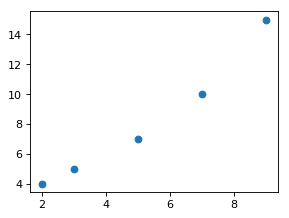

In [44]:
plt.figure(figsize=(4, 3), dpi=80)
plt.scatter(x,y)

$$ m = \frac{ N \Sigma(xy) - \Sigma(x)\Sigma(y) } {N \Sigma(x^2)- (\Sigma(x))^2  } $$
<br>

$$ b = \frac{\Sigma y - m \Sigma x } {N}$$

In [72]:
def fit(x:np.array, y:np.array):
    N = x.shape[0]
    
    nom = N*np.dot(x,y) - x.sum()*y.sum()
    den = N* np.dot(x,x) - np.dot(x.sum(),x.sum()) 
    m = nom/den
    b = (y.sum()- m * x.sum() )/N
    
    return m, b

def predict(x,m,b):
    y = m*x+b
    return y

In [73]:
m,b = fit(x,y)
y_pred = predict(x,m,b)

In [75]:
#                                                PLOTTING:
#                              --------------------------------------------
def plot(x,y,y_pred):
    # Create figure
    fig = plt.figure(figsize=(7, 5))
    ax = plt.subplot(111)

    # Scatter data points
    ax.scatter(x, y, c='#1f77b4', label='data points')

    ax.plot(x, y_pred, c='#ff7f0e')
    # # Aesthetic parameters
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.set_title('Linear Regression')

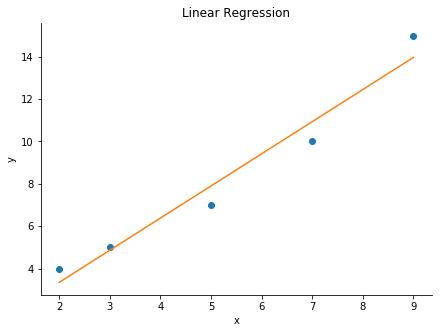

In [77]:
plot(x,y,y_pred)

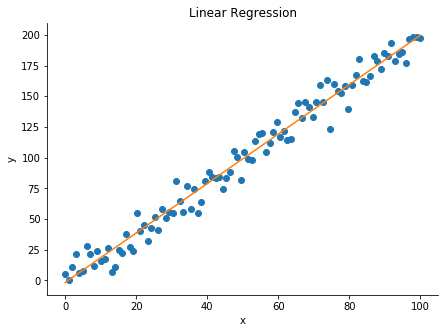

In [78]:
x = np.linspace(0, 100, 100)  # training examples
y = 2 * x + 10 * np.random.normal(size=100)  # labels

m,b = fit(x,y)
y_pred = predict(x,m,b)
plot(x,y,y_pred)

In [79]:
class LinearRegression:
       
    def __init__(self, random_seed=42):

        self.m, self.b = self.initialize(random_seed)

    def initialize(self, seed):
        """
        Method that initializes the weights to random values.
        """
        np.random.seed(seed)
        m = np.random.random()
        b = np.random.random()
        return m, b

    def predict(self, x):
        """
        Method that makes predictions for a number of points.
        """
        return self.m * x + self.b

    def fit(self, x, y):
        """
        Method that handles the whole training procedure.
        """
        N = x.shape[0]
    
        nom = N*np.dot(x,y) - x.sum()*y.sum()
        den = N* np.dot(x,x) - np.dot(x.sum(),x.sum()) 
        self.m = nom/den
        self.b = (y.sum()- self.m * x.sum() )/N
    
        return None

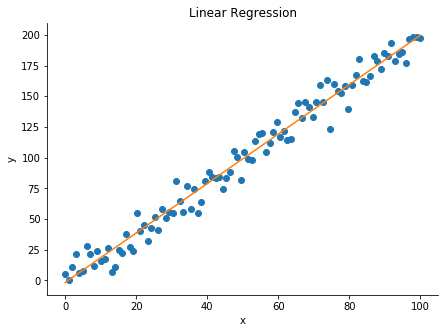

In [82]:
lr = LinearRegression()
lr.fit(x,y)
y_hat = lr.predict(x)
plot(x,y,y_hat)